In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

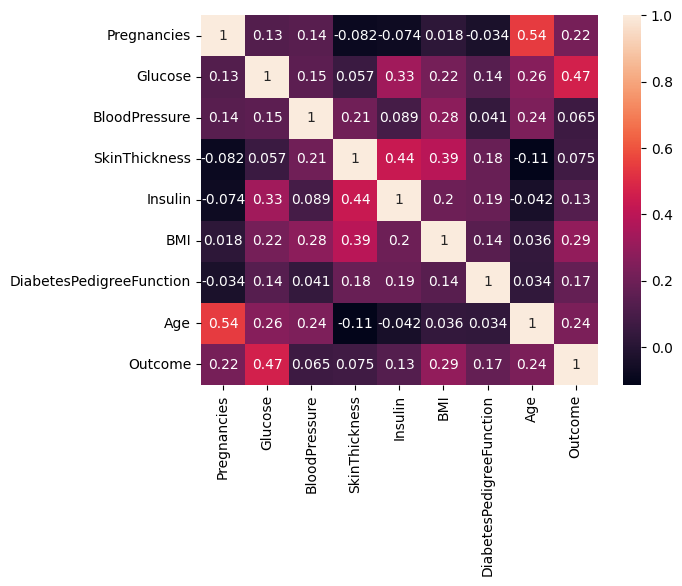

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 ---> Non Diabetic
1 ----> Diabetic

In [ ]:
# separating the data label
x = df.drop(columns= 'Outcome',axis=1)
y = df['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(x)
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
x = scaled_data
y = df['Outcome']

# Train Test Split

In [ ]:
#splitting the data into training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Applying SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
Outcome
1    400
0    400
Name: count, dtype: int64


# Training the model

In [ ]:
models = {
    "RandomForest" : RandomForestClassifier(random_state=2),
    "SVC":SVC(probability=True,random_state=2),
    'LogisticRegression': LogisticRegression(random_state=2, max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(random_state=2),
    'svm.svc': svm.SVC(kernel='linear')

}

In [ ]:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'svm.svc' : {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}
}


In [ ]:
for model_name in models:
  print(models[model_name])

RandomForestClassifier(random_state=2)
SVC(probability=True, random_state=2)
LogisticRegression(max_iter=1000, random_state=2)
GradientBoostingClassifier(random_state=2)
SVC(kernel='linear')


In [ ]:
best_models = {}
for model_name in models:
  print(f"\nTuning hyperparameters for {model_name}...")
  random_search = RandomizedSearchCV(models[model_name],param_grids[model_name],n_iter=10)
  random_search.fit(x_train,y_train)

  print(f"Best hyperparameters for {model_name}: {random_search.best_params_}")
  best_model = random_search.best_estimator_
  best_models[model_name] = best_model

    # Cross-validation score
  cross_val = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy').mean()
  print(f"Cross-validation accuracy for {model_name}: {cross_val:.4f}")



Tuning hyperparameters for RandomForest...
Best hyperparameters for RandomForest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Cross-validation accuracy for RandomForest: 0.8275

Tuning hyperparameters for SVC...
Best hyperparameters for SVC: {'kernel': 'rbf', 'C': 10}
Cross-validation accuracy for SVC: 0.8200

Tuning hyperparameters for LogisticRegression...
Best hyperparameters for LogisticRegression: {'solver': 'lbfgs', 'C': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-validation accuracy for LogisticRegression: 0.7700

Tuning hyperparameters for GradientBoosting...
Best hyperparameters for GradientBoosting: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Cross-validation accuracy for GradientBoosting: 0.8138

Tuning hyperparameters for svm.svc...
Best hyperparameters for svm.svc: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced', 'C': 10}
Cross-validation accuracy for svm.svc: 0.8200


In [ ]:
final_model2 = best_models['RandomForest']
final_model2

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2)

In [ ]:
final_model= best_models['svm.svc']
final_model

SVC(C=10, class_weight='balanced')

# Model Evaluation

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
   # Metrics
  metrics = {
        "train_accuracy": accuracy_score(y_train, train_pred),
        "test_accuracy": accuracy_score(y_test, test_pred),
        "classification_report_test": classification_report(y_test, test_pred),
        "confusion_matrix_test": confusion_matrix(y_test, test_pred)
    }

    # Print metrics
  print(f"\nTrain Accuracy: {metrics['train_accuracy']}")
  print(f"Test Accuracy: {metrics['test_accuracy']}")
  print("\nClassification Report (Test Data):\n", metrics["classification_report_test"])
  print("\nConfusion Matrix (Test Data):\n", metrics["confusion_matrix_test"])

    # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(metrics["confusion_matrix_test"], annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
  plt.title("Confusion Matrix (Test Data)")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  return metrics


Train Accuracy: 0.99625
Test Accuracy: 0.7402597402597403

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


Confusion Matrix (Test Data):
 [[80 20]
 [20 34]]


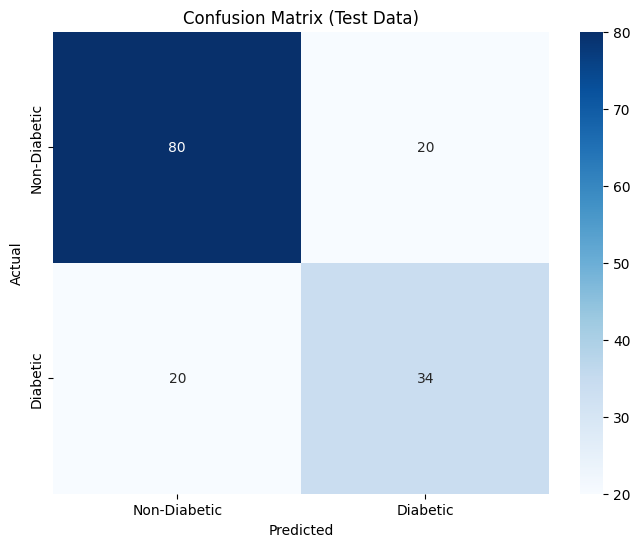

In [ ]:
final_model2.fit(x_train, y_train)
metrics = evaluate_model(final_model2, x_train, y_train, x_test, y_test)

• The above ***Random Forest model***  is clearly overfitting so we moving to SVM


Train Accuracy: 0.77375
Test Accuracy: 0.7467532467532467

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.64      0.65      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix (Test Data):
 [[80 20]
 [19 35]]


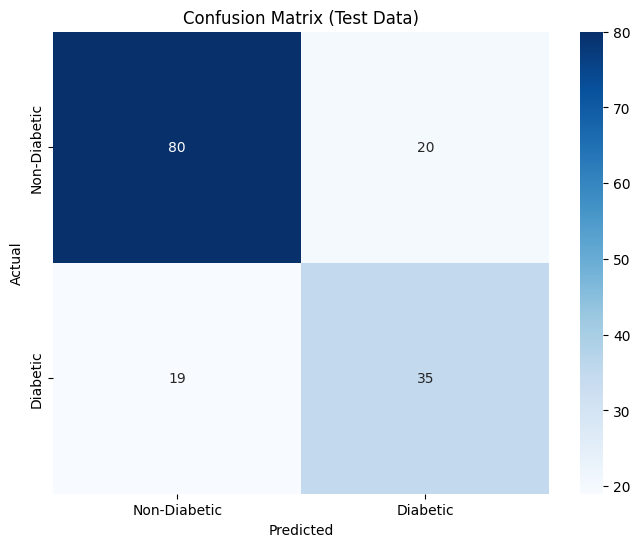

In [ ]:
final_model.fit(x_train, y_train)
metrics = evaluate_model(final_model, x_train, y_train, x_test, y_test)

# making a predictive system

In [ ]:
input_data = (4,110,92,0,0,37.6,8.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = final_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  23.31266965 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
filename = 'diabetes_disease_model.sav'
pickle.dump(final_model,open(filename,'wb'))
loaded_model = pickle.load(open('diabetes_disease_model.sav','rb'))